<a href="https://colab.research.google.com/github/Confidentrf/Cattura/blob/master/3_3_Transfer_Learning_With_TensorFlow_Hub_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer Learning with TensorFlow Hub

Image Classification

This notebook is very similar to the example from Section 2 Transfer Learning witha pretrained ConvNet Except for the following:

Datasets: the Oxford Flowers 102 (instead of the tf_flowers dataset)
Base model: MobileNetv2 from TensorFlow Hub (instead of tf.keras.applications)

In [ ]:
# Enable TensorFlow 2.0
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

# Verify TensorFlow version
print(tf.__version__)

# Create a constant tensor
hello = tf.constant('Hello, TensorFlow!')

# Use tf.print instead of session run
tf.print(hello)


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0
Hello, TensorFlow!


In [ ]:
#import tensorflow
import tensorflow as tf
tf.__version__

'2.17.0'

In [ ]:
#Import Tensorflow Hub
import tensorflow_hub as hub
print ("Hub version:" , hub.__version__)

Hub version: 0.16.1


In [ ]:
# Import Numpy
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np
import matplotlib.pyplot as plt


Data Pipeline

In [ ]:
#This will split the traiing set into 60% (for traiing) and 40% (for validation)
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews",
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True,
)


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


This now Explors the dataset

In [ ]:
# Take a look at the test for a few reviews
train_examples_batch, train_labels_batch = next(iter(train_data.batch(3)))
train_examples_batch

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [ ]:
#take a look at a some of the lables
train_labels_batch

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([0, 0, 0])>

Training

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples_batch[5:])

<tf.Tensor: shape=(0, 20), dtype=float32, numpy=array([], shape=(0, 20), dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(), dtype=tf.string))
model.add(tf.keras.layers.Lambda(lambda x: hub_layer(x)))  # Wrap hub_layer in a Lambda layer
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Compial the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Train The model

In [ ]:
Num_EPOCHS = 20

In [ ]:
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=Num_EPOCHS,
                    validation_data=validation_data.batch(512),
                    verbose=1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5854 - loss: 0.7430 - val_accuracy: 0.5997 - val_loss: 0.6829
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.5984 - loss: 0.6777 - val_accuracy: 0.6137 - val_loss: 0.6493
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6142 - loss: 0.6456 - val_accuracy: 0.6196 - val_loss: 0.6334
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6208 - loss: 0.6352 - val_accuracy: 0.6309 - val_loss: 0.6237
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.6327 - loss: 0.6269 - val_accuracy: 0.6456 - val_loss: 0.6170
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6411 - loss: 0.6200 - val_accuracy: 0.6508 - val_loss: 0.6090
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6483 - loss: 0.6134 - val_accuracy: 0.6580 - val_loss: 0.6030
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6596 - loss: 0.6004 - val_accuracy: 0.6567 - 

In [ ]:
def display_training_curves(history, title):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(Num_EPOCHS)

  plt.plot(epochs, acc, label='Training Accuracy')
  plt.plot(epochs, val_acc, label='Validation Accuracy')
  plt.title(title)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')

  plt.show()

Display Traiing Curve


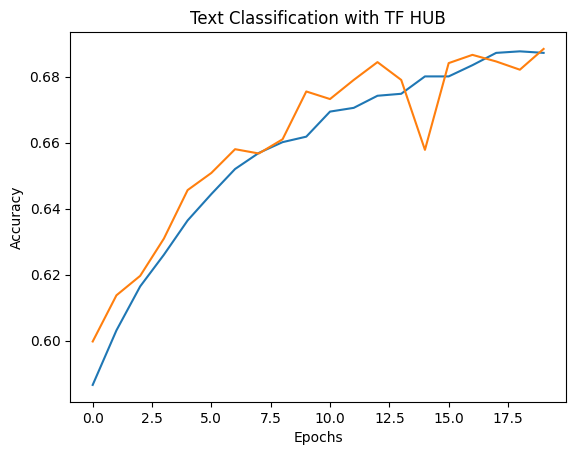

In [ ]:
display_training_curves(history, "Text Classification with TF HUB")

In [ ]:
#Evaluate Model ** huge dip in accuracy***
results = model.evaluate(test_data.batch(512), verbose=2)

for name, values in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, values))

49/49 - 3s - 54ms/step - accuracy: 0.6779 - loss: 0.5730
loss: 0.573
compile_metrics: 0.678


In [ ]:
Summary TF HUB data classification pretained classification bedding